##Membaca Data

Pada tahap ini saya akan menghubungkan google colab dengan kaggle sehingga pengambilan dataset dapat lebih cepat dan mudah, hal yang perlu dilakukan adalah sebagai berikut

1. Hubungkan google drive pada google colab
2. Dapatkan Token API dari Kaggle Profile
3. Upload Kaggle API json ke folder pada Google drive
4. Download dataset dari Kaggle API yang diinginkan
5. ekstrak file tersebut
6. read file tersebut menggunakan code dan pastikan path penyimpanan telah sesuai

....

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Tahap ini adalah tahap menghubungkan google drive ke google colab

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

Tahap ini adalah tahap menghubungakan direktori file API json yang telah di upload ke direktori pada google colab

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


Tahap ini adalah tahap mengarahkan file yang di download nanti pada direktrori /content/gdrive/My Drive/Kaggle 

In [4]:
!kaggle datasets download -d hassanamin/atis-airlinetravelinformationsystem

atis-airlinetravelinformationsystem.zip: Skipping, found more recently modified local copy (use --force to force download)


Tahap ini adalah tahap download file yang ada pada kaggle menggunakan API 

In [5]:
!unzip \*.zip  && rm *.zip

Archive:  atis-airlinetravelinformationsystem.zip
replace atis_intents.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Tahap ini adalah tahap mengekstrak file yang telah didownload

In [6]:
import pandas as pd

data_train = pd.read_csv('/content/gdrive/MyDrive/Kaggle/atis_intents_train.csv', names=['label', 'sentence'])
data_test = pd.read_csv('/content/gdrive/MyDrive/Kaggle/atis_intents_test.csv', names=['label', 'sentence'])

Tahap ini adalah tahap membaca file dan membuat nama columns yang diperlukan

In [7]:
print("Lima data pertama dari data train \n")
print(data_train.head())

print("\n")

print("Lima data pertama dari data test \n")
print(data_test.head())

Lima data pertama dari data train 

              label                                           sentence
0       atis_flight   i want to fly from boston at 838 am and arriv...
1       atis_flight   what flights are available from pittsburgh to...
2  atis_flight_time   what is the arrival time in san francisco for...
3      atis_airfare            cheapest airfare from tacoma to orlando
4      atis_airfare   round trip fares from pittsburgh to philadelp...


Lima data pertama dari data test 

          label                                           sentence
0   atis_flight   i would like to find a flight from charlotte ...
1  atis_airfare   on april first i need a ticket from tacoma to...
2   atis_flight   on april first i need a flight going from pho...
3   atis_flight   i would like a flight traveling one way from ...
4   atis_flight   i would like a flight from orlando to salt la...


##Membersihkan dan Menganalisis Data

In [8]:
print(data_train.shape)
print(data_test.shape)

(4834, 2)
(800, 2)


Pada tahap ini kita bisa melihat dimensi data pada tabel untuk data train dan data test

perbandingan data train pada data test kali ini adalah 85% berbanding 15%

In [9]:
print("class label data train \n")
print(data_train['label'].unique())

print(" \n")

print('class label data test \n')
print(data_test['label'].unique())

class label data train 

['atis_flight' 'atis_flight_time' 'atis_airfare' 'atis_aircraft'
 'atis_ground_service' 'atis_airline' 'atis_abbreviation' 'atis_quantity']
 

class label data test 

['atis_flight' 'atis_airfare' 'atis_ground_service' 'atis_airline'
 'atis_flight_time' 'atis_quantity' 'atis_abbreviation' 'atis_aircraft']


Pada tahap ini kita bisa melihat class yang dimiliki data train dan data tess telah sama dan terdapat 8 class yaitu 
1. atis_flight
2. atis_flight_time
3. atis_airfare
4. atis_aircraft
5. atis_ground_service
6. atis_airline
7. atis_abbreviation
8. atis_quantity

In [10]:
print("Informasi pada data train \n")
print(data_train.info())

print("\n")

print("Informasi pada data test \n")
print(data_test.info())

Informasi pada data train 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4834 entries, 0 to 4833
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     4834 non-null   object
 1   sentence  4834 non-null   object
dtypes: object(2)
memory usage: 75.7+ KB
None


Informasi pada data test 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     800 non-null    object
 1   sentence  800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB
None


Pada tahap ini kita dapat melihat informasi tentang DataFrame pada data train dan data test yang telah dibaca berupa indeks dtype, kolom, nilai non-null, dan penggunaan memori.

kedua data yang digunakan kali ini tidak memiliki nilai null sehingga tidak ada data yang kosong yang perlu di isi atau dihapus

In [11]:
print("jumlah data train berdasarkan class yang ada \n")
print(data_train['label'].value_counts())

print(" \n")

print("jumlah data test berdasarkan class yang ada \n")
print(data_test['label'].value_counts())

jumlah data train berdasarkan class yang ada 

atis_flight            3666
atis_airfare            423
atis_ground_service     255
atis_airline            157
atis_abbreviation       147
atis_aircraft            81
atis_flight_time         54
atis_quantity            51
Name: label, dtype: int64
 

jumlah data test berdasarkan class yang ada 

atis_flight            632
atis_airfare            48
atis_airline            38
atis_ground_service     36
atis_abbreviation       33
atis_aircraft            9
atis_quantity            3
atis_flight_time         1
Name: label, dtype: int64


Pada tahap ini kita dapat melihat ketimpangan pada jumlah data yang memiliki class "atis_flight" untuk data train dan data test.


Bar chart dari jumlah class data train 

AxesSubplot(0.125,0.125;0.775x0.755)


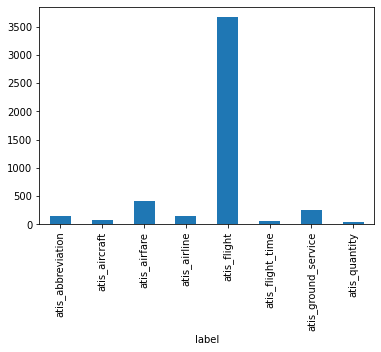

In [12]:
print("Bar chart dari jumlah class data train \n")
print(data_train.groupby('label').size().plot(kind='bar'))

Pada tahap ini sebaiknya data dibersihkan dengan cara menghapus beberapa data yang memiliki class atis_flight karena data yang ada termasuk data yang imbalance, namun saat ini kita akan mencoba untuk tidak membersihkannya apabila akuarasi pembelajaran mesin yang dihasilkan buruk baru kita akan membersihkannya

Bar chart dari jumlah class data test 

AxesSubplot(0.125,0.125;0.775x0.755)


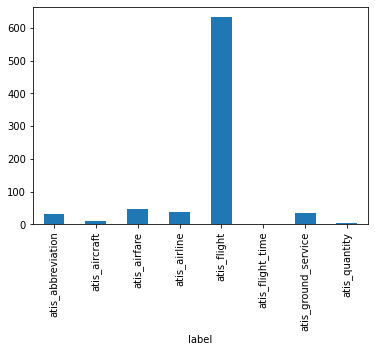

In [13]:
print("Bar chart dari jumlah class data test \n")
print(data_test.groupby('label').size().plot(kind='bar'))

Pada tahap ini sebaiknya data dibersihkan dengan cara menghapus beberapa data yang memiliki class atis_flight karena data yang ada termasuk data yang imbalance, namun saat ini kita akan mencoba untuk tidak membersihkannya apabila akuarasi pembelajaran mesin yang dihasilkan buruk baru kita akan membersihkannya

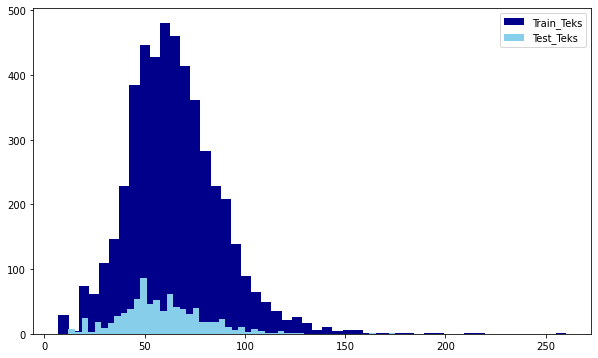

In [14]:
import matplotlib.pyplot as plt

length_train = data_train['sentence'].str.len()
length_test = data_test['sentence'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_Teks", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_Teks', color = "skyblue")
plt.legend()

Pada tahap ini kita akan melihat panjang teks dalam data train dan data test, perbandingannya sudah cukup seimbang untuk perbandingan 85% data train dan 15% data test


##Feature Engineering

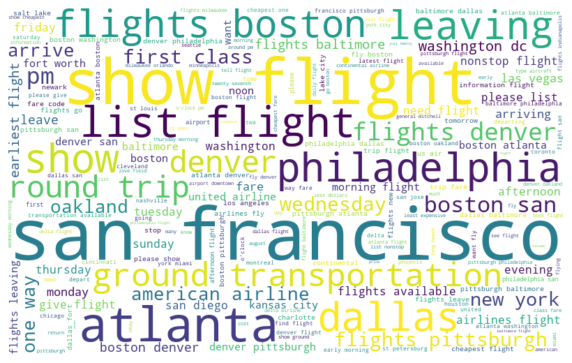

In [15]:
from wordcloud import WordCloud 

def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
 
all_words = ' '.join([text for text in data_train['sentence']])
wordCloud(all_words)

Pada tahap ini kita akan melihat kata pada seluruh data train dengan memahami kata yang paling banyak muncuk menggunakan plot word cloud

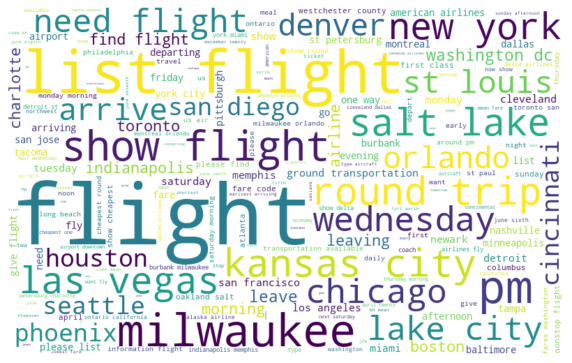

In [16]:
all_words = ' '.join([text for text in data_test['sentence']])
wordCloud(all_words)

Pada tahap ini kita akan melihat kata pada seluruh data test dengan memahami kata yang paling banyak muncuk menggunakan plot word cloud

In [17]:
# melakukan vektorisasi untuk mengekstrak fitur dengan TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer



vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
 
#
train_vectors = vectorizer.fit_transform(data_train['sentence'])
test_vectors = vectorizer.transform(data_test['sentence'])

Pada tahap ini kita melakukan vektorisasi untuk mengekstrak fitur dengan TF-IDF, TF-IDF adalah proses scaling berdasarkan seberapa sering kata tersebut muncul pada teks dan seluruh dokumen, sehingga kita dapat menghilangkan nilai pada data yang terlalu sering muncul dan yang jarang sekali muncul

##Latih Model dengan Support Vector Machine

In [18]:
from sklearn import svm

classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, data_train['label'])
prediction_linear = classifier_linear.predict(test_vectors)

Pada tahap ini adalah proses membuat dan melatih model klasifikasi dengan Support Vector Machine dengan kernel=linear

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(data_test['label'], prediction_linear)

print('Confusion Matrix\n')
confusion

Confusion Matrix



array([[ 33,   0,   0,   0,   0,   0,   0,   0],
       [  0,   8,   0,   0,   0,   0,   0,   1],
       [  0,   0,  47,   0,   1,   0,   0,   0],
       [  0,   0,   0,  37,   1,   0,   0,   0],
       [  0,   3,   3,   3, 619,   0,   0,   4],
       [  0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  36,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3]])

Pada Tahap ini ditampilkan confusiun matrix, confusion matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih. 
1. True Positive (TP) : memprediksi positif dan itu benar
2. True Negative (TN) : memprediksi negatif dan itu benar
3. False Positive (FP) : memprediksi positif dan itu salah
4. False Negative (FN) : memprediksi negatif dan itu sala 

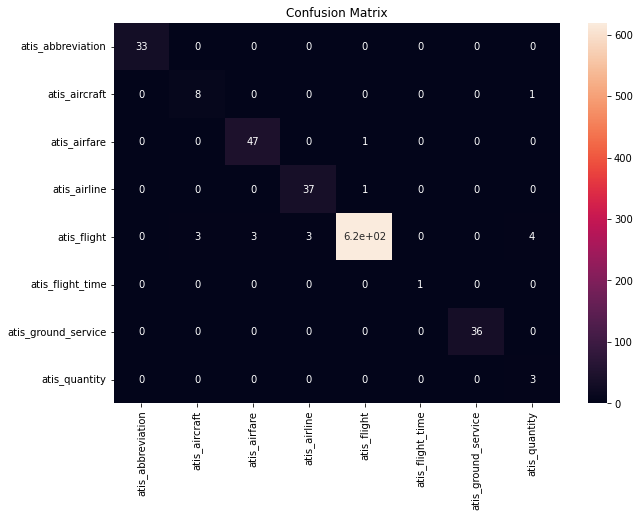

In [20]:
cfm = [[ 33,   0,   0,   0,   0,   0,   0,   0],
       [  0,   8,   0,   0,   0,   0,   0,   1],
       [  0,   0,  47,   0,   1,   0,   0,   0],
       [  0,   0,   0,  37,   1,   0,   0,   0],
       [  0,   3,   3,   3, 619,   0,   0,   4],
       [  0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  36,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3]]

labels = ['atis_abbreviation', 'atis_aircraft', 'atis_airfare', 'atis_airline', 'atis_flight', 'atis_flight_time', 'atis_ground_service', 'atis_quantity']
df_cfm = pd.DataFrame(cfm, index = labels, columns = labels)
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix')
cfm_plot = sns.heatmap(df_cfm, annot=True) 

Pada Tahap ini meruapakan plot dari true labels (columns) dan predicted label (rows) dari confusien matrix

In [21]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(data_test['label'], prediction_linear)
print('Accuracy: ', accuracy)

Accuracy:  0.98


Pada tahap ini kita dapat melihat classification report dari model yang telah kita buat dan hasil akurasinya sudah baik yaitu 98%

In [22]:
from sklearn.metrics import classification_report

target_names = ['atis_flight','atis_flight_time','atis_airfare','atis_aircraft','atis_ground_service','atis_airline','atis_abbreviation','atis_quantity']
print(classification_report(data_test['label'], prediction_linear, target_names=target_names))

                     precision    recall  f1-score   support

        atis_flight       1.00      1.00      1.00        33
   atis_flight_time       0.73      0.89      0.80         9
       atis_airfare       0.94      0.98      0.96        48
      atis_aircraft       0.93      0.97      0.95        38
atis_ground_service       1.00      0.98      0.99       632
       atis_airline       1.00      1.00      1.00         1
  atis_abbreviation       1.00      1.00      1.00        36
      atis_quantity       0.38      1.00      0.55         3

           accuracy                           0.98       800
          macro avg       0.87      0.98      0.91       800
       weighted avg       0.98      0.98      0.98       800



Pada tahap ini kita dapat melihat classification report dari model yang telah kita buat, classification report berupa  precision, recall, f1-score, support

##Uji Model

In [23]:
teks = """what is the arrival time in Indonesia"""
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['atis_flight_time']


Pada tahap ini saya memberikan sembarang teks dan hasilnya sudah dapat memprediksi dengan baik class yang tepat untuk teks yang ada